#### Key Resources:

ARIMA(p,d,q)

p -> PACF

d -> # differences

q -> ACF

[Statsmodels ARMA Results](http://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARMAResults.html#statsmodels.tsa.arima_model.ARMAResults)

[Statsmodels Ljung-Box Test](http://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html)

In [1]:
import statsmodels as sm
from statsmodels import api as smi
from statsmodels import graphics as smg
from statsmodels import tsa as tsa 
# from statsmodels import tsa
# from statsmodels import graphics as smg
import numpy as np
from scipy import stats as SPstats
from time import strptime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
# import pygal as pg
import math
import itertools as it
%matplotlib inline



sm.__version__

/Users/Sam_I_Am/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


'0.8.0'

In [3]:
unEmp_init = pd.read_csv('UNEMPLOYMENT.csv')
unEmp_init.set_index('DATE', inplace=True)
unEmp_init['LogUnEmp'] = unEmp_init['UNEMPLOYMENT'].apply(math.log)
unEmp_init

UNEMPLOYMENT  LogUnEmp
DATE                             
1/1/1948            3.4  1.223775
2/1/1948            3.8  1.335001
3/1/1948            4.0  1.386294
4/1/1948            3.9  1.360977
5/1/1948            3.5  1.252763
6/1/1948            3.6  1.280934
7/1/1948            3.6  1.280934
8/1/1948            3.9  1.360977
9/1/1948            3.8  1.335001
10/1/1948           3.7  1.308333
11/1/1948           3.8  1.335001
12/1/1948           4.0  1.386294
1/1/1949            4.3  1.458615
2/1/1949            4.7  1.547563
3/1/1949            5.0  1.609438
4/1/1949            5.3  1.667707
5/1/1949            6.1  1.808289
6/1/1949            6.2  1.824549
7/1/1949            6.7  1.902108
8/1/1949            6.8  1.916923
9/1/1949            6.6  1.887070
10/1/1949           7.9  2.066863
11/1/1949           6.4  1.856298
12/1/1949           6.6  1.887070
1/1/1950            6.5  1.871802
2/1/1950            6.4  1.856298
3/1/1950            6.3  1.840550
4/1/1950            5.8  1.757858
5/1/1950            5.5  1.704748
6/1/1950            5.4  1.686399
...                 ...       ...
7/1/2015            5.2  1.648659
8/1/2015            5.1  1.629241
9/1/2015            5.0  1.609438
10/1/2015           5.0  1.609438
11/1/2015           5.0  1.609438
12/1/2015           5.0  1.609438
1/1/2016            4.9  1.589235
2/1/2016            4.9  1.589235
3/1/2016            5.0  1.609438
4/1/2016            5.0  1.609438
5/1/2016            4.7  1.547563
6/1/2016            4.9  1.589235
7/1/2016            4.9  1.589235
8/1/2016            4.9  1.589235
9/1/2016            5.0  1.609438
10/1/2016           4.9  1.589235
11/1/2016           4.6  1.526056
12/1/2016           4.7  1.547563
1/1/2017            4.8  1.568616
2/1/2017            4.7  1.547563
3/1/2017            4.5  1.504077
4/1/2017            4.4  1.481605
5/1/2017            4.3  1.458615
6/1/2017            4.3  1.458615
7/1/2017            4.3  1.458615
8/1/2017            4.4  1.481605
9/1/2017            4.2  1.435085
10/1/2017           4.1  1.410987
11/1/2017           4.1  1.410987
12/1/2017           4.1  1.410987

[840 rows x 2 columns]

<class 'pandas.core.series.Series'>


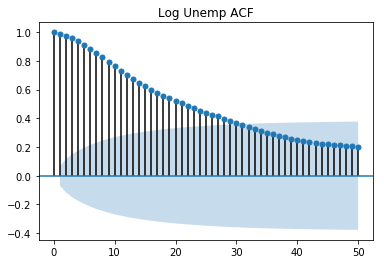

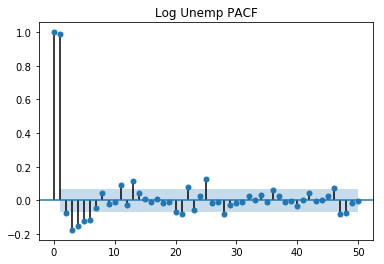

In [4]:
# Log Unemployment ACF, PACF
print(type(unEmp_init['LogUnEmp']))
smg.tsaplots.plot_acf(unEmp_init['LogUnEmp'], lags=50)
plt.title('Log Unemp ACF')
smg.tsaplots.plot_pacf(unEmp_init['LogUnEmp'], lags=50)
plt.title('Log Unemp PACF')

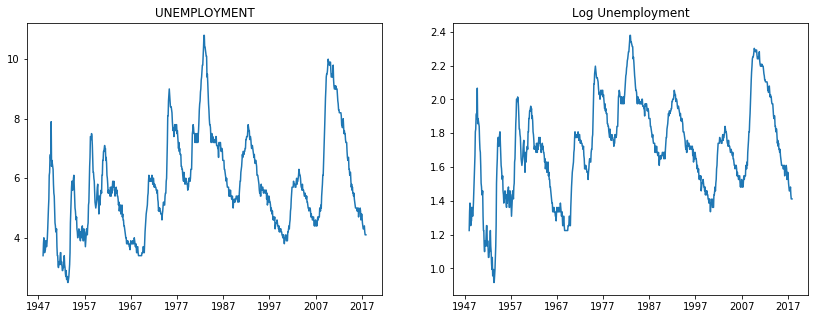

In [5]:
# plot unemployment and log unemployment
fig, unEmp_plot = plt.subplots(nrows=1,ncols=2, figsize=(14,5))
unEmp_plot[0].plot(pd.to_datetime(unEmp_init.index),unEmp_init['UNEMPLOYMENT'])
unEmp_plot[0].set_title('UNEMPLOYMENT')
unEmp_plot[1].plot(pd.to_datetime(unEmp_init.index),unEmp_init['LogUnEmp'])
unEmp_plot[1].set_title('Log Unemployment')

In [6]:
# fit an ARMA(1,0) model.
logUnEmp_ma1 = tsa.arima_model.ARMA(unEmp_init['LogUnEmp'],order=(1,0))
# trend='nc' removes constant 
logUnEmp_ma1 = logUnEmp_ma1.fit(trend='nc')
logUnEmp_ma1.summary()

/Users/Sam_I_Am/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/Sam_I_Am/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               LogUnEmp   No. Observations:                  840
Model:                     ARMA(1, 0)   Log Likelihood                1550.296
Method:                       css-mle   S.D. of innovations              0.038
Date:                Wed, 25 Apr 2018   AIC                          -3096.591
Time:                        12:33:24   BIC                          -3087.124
Sample:                    01-01-1948   HQIC                         -3092.963
                         - 12-01-2017                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.LogUnEmp     0.9996      0.000   2389.622      0.000       0.999       1.000
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0004           +0.0000j            1.0004            0.0000
-----------------------------------------------------------------------------
"""

In [7]:
# use function below to calculate AICc for different combinations 

def calcAICc(observations, constant):
    
    trendVal = str(constant)
    # below is for all combinations of (p,q) <= 2
    combos = list(it.permutations(range(3),r=2))
    result_li = []
    
    
    for ea in combos: 
        ARMAaiccCalc = tsa.arima_model.ARMA(observations,order=ea) 
        # trend= indicates whether to use constant('c') or not ('nc'). 
        try:
            ARMAaiccCalc = ARMAaiccCalc.fit(trend=trendVal)
            logLikeli = ARMAaiccCalc.llf
            n_obs = ARMAaiccCalc.nobs
            #AICc calc
            AICc =  -2*logLikeli + 2*(sum(ea) + 1)*(n_obs/(n_obs-sum(ea)-2))
        except ValueError: 
            AICc = 0
            pass

    
        result_li.append([ea, AICc])
        
    res_DF = pd.DataFrame(result_li)
    res_DF.columns = ['(p,q)','AICc']
    # res_DF['Abs AICc'] = abs(res_DF['AICc'])
    res_DF.sort_values('AICc', ascending=True, inplace=True)
    
    return res_DF
        
    


In [ ]:
aicsNC = calcAICc(unEmp_init['LogUnEmp'],'nc')
aicsC = calcAICc(unEmp_init['LogUnEmp'],'c')
# max with constant is higher!! 

In [ ]:
# AICc for ARMA(2,1) with constant is highest!
aicsC

In [ ]:
aicsNC

In [8]:
# fit an ARMA(2,1) model.
logUnEmp_arma21 = tsa.arima_model.ARMA(unEmp_init['LogUnEmp'],order=(2,1))
# trend='nc' removes constant 
logUnEmp_arma21 = logUnEmp_arma21.fit(trend='c')
logUnEmp_arma21.summary()

/Users/Sam_I_Am/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/Sam_I_Am/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               LogUnEmp   No. Observations:                  840
Model:                     ARMA(2, 1)   Log Likelihood                1594.846
Method:                       css-mle   S.D. of innovations              0.036
Date:                Wed, 25 Apr 2018   AIC                          -3179.691
Time:                        12:33:42   BIC                          -3156.024
Sample:                    01-01-1948   HQIC                         -3170.621
                         - 12-01-2017                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.6925      0.066     25.532      0.000       1.563       1.822
ar.L1.LogUnEmp     1.8840      0.028     67.133      0.000       1.829       1.939
ar.L2.LogUnEmp    -0.8886      0.028    -32.006      0.000      -0.943      -0.834
ma.L1.LogUnEmp    -0.7493      0.038    -19.683      0.000      -0.824      -0.675
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0601           -0.0401j            1.0608           -0.0060
AR.2            1.0601           +0.0401j            1.0608            0.0060
MA.1            1.3347           +0.0000j            1.3347            0.0000
-----------------------------------------------------------------------------
"""

In [9]:
# forecast 30 steps ahead

arma21_forecast = logUnEmp_arma21.forecast(steps=30)
#arma21_forecastDF = pd.DataFrame(arma21_forecast)
arma21_forecast

#for step in arma21_forecast:

# for i in arma21_forecast: print(type(i[0]))
CIs = pd.DataFrame(arma21_forecast[2][:])
CIs.columns=[['.025 CI','.975 CI']]
    
arma21_forecastDF = pd.DataFrame(arma21_forecast[0][:])
arma21_forecastDF.columns=['Forecast']
#arma21_forecastDF['.025 CI'] = arma21_forecast[2][0][:]
#arma21_forecastDF['.975 CI'] = arma21_forecast[2][1][:]

arma21_forecastDFfull = pd.concat([arma21_forecastDF, CIs], axis=1)
arma21_forecastDFfull

/Users/Sam_I_Am/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Forecast  (.025 CI,)  (.975 CI,)
0   1.410741    1.339895    1.481587
1   1.411829    1.304676    1.518982
2   1.414097    1.275123    1.553072
3   1.417404    1.248896    1.585913
4   1.421619    1.225216    1.618022
5   1.426620    1.203725    1.649516
6   1.432298    1.184218    1.680378
7   1.438550    1.166552    1.710547
8   1.445283    1.150617    1.739949
9   1.452413    1.136311    1.768515
10  1.459862    1.123542    1.796182
11  1.467561    1.112219    1.822903
12  1.475445    1.102253    1.848637
13  1.483458    1.093557    1.873359
14  1.491548    1.086045    1.897051
15  1.499669    1.079632    1.919705
16  1.507779    1.074237    1.941321
17  1.515844    1.069781    1.961907
18  1.523829    1.066184    1.981474
19  1.531707    1.063373    2.000041
20  1.539454    1.061277    2.017630
21  1.547047    1.059828    2.034266
22  1.554470    1.058960    2.049979
23  1.561706    1.058613    2.064799
24  1.568742    1.058727    2.078757
25  1.575569    1.059251    2.091888
26  1.582178    1.060131    2.104226
27  1.588563    1.061321    2.115806
28  1.594719    1.062777    2.126661
29  1.600643    1.064458    2.136828

In [ ]:
#ax1 = plt.Figure(figsize=(20,5))
predPlot = logUnEmp_arma21.plot_predict(start=0, end=869, plot_insample=True)


In [ ]:
# Ljung_box stat on residuals 
ljb_LogUnEmp_arma21 = sm.stats.diagnostic.acorr_ljungbox(logUnEmp_arma21.resid)

#first 10 p value
ljb_LogUnEmp_arma21[1][12]

In [ ]:
# normal probability plot of residuals
arma21_resids = logUnEmp_arma21.resid

smg.gofplots.ProbPlot(arma21_resids).probplot()
plt.title("Probability Plot Residuals")
plt.show()



In [ ]:
# histogram of residuals 
plt.figure(figsize=(15,10))
#plt.grid()
n, bins, patches = plt.hist(arma21_resids, bins='auto')
plt.xlabel('Residual')
plt.ylabel('Probability')
plt.title('Residuals')
plt.xticks(bins, rotation='vertical')



In [ ]:
#ACF, PACF of residuals for ARMA(2,1)

smg.tsaplots.plot_acf(arma21_resids, lags=100)
plt.title('Residual ACF')
smg.tsaplots.plot_pacf(arma21_resids, lags=100)
plt.title('Residual PACF')

## Scratch Work Below

In [ ]:
for i in it.permutations(range(3),r=2): print(type(i), i, i[0],i[1], sum(i))

logLikeli = logUnEmp_ma1.llf
n_obs = logUnEmp_ma1.nobs

combos = it.permutations(range(3),r=2)

In [ ]:
combos = list(it.permutations(range(3),r=2))
print(combos)
for ea in combos:
    ARMAaiccCalc = tsa.arima_model.ARMA(unEmp_init['LogUnEmp'],order=ea) 
    try:
        ARMAaiccCalc = ARMAaiccCalc.fit( trend='nc')
        llf_ea = ARMAaiccCalc.llf
    except ValueError: 
        llf_ea = 0
        pass
    
    
    print(ea, llf_ea)